In [35]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score





In [36]:
%matplotlib inline


In [37]:
path_to_csv = "../data/housing_data.csv"
image_dir = "../data/images/" 
column_names = ["id", "url", "imageurl", "header", "price", "sqmprice", "sqm", "floor", "rooms", "bedrooms", "address"]


In [38]:
df = pd.read_csv(path_to_csv, names=column_names, header=None)
image_files = set(os.listdir(image_dir))
valid_ids = {int(filename.split('.')[0]) for filename in image_files if filename.split('.')[0].isdigit()}
df = df[df.iloc[:, 0].isin(valid_ids)]
df = df.dropna() # We lost 5% of the data, problem seems to be with the method of scraping or the website error itself
df.drop(['url', 'imageurl'], axis=1, inplace=True)

In [39]:
def modify_address(addr):
    parts = addr.split(',', 1)  
    return parts[1].strip() if len(parts) > 1 else addr

In [40]:
#mask = df["address"].isin(df["address"].value_counts()[df["address"].value_counts() < 30].index)

# Filter the dataframe using the mask
#df.loc[mask, 'address'] = df.loc[mask, 'address'].apply(modify_address)
#df['address'] = df['address'].str.replace(', ', '', regex=True)
#mask = df["address"].isin(df["address"].value_counts()[df["address"].value_counts() < 30].index)

#df.loc[mask, 'address'] = df.loc[mask, 'address'].apply(modify_address)

#mask = df["address"].isin(df["address"].value_counts()[df["address"].value_counts() > 40].index)

#df = df[mask]

In [41]:
#df['address'] = df['address'].str.replace(', ', '', regex=True)

In [42]:
#df[df['address'].str.startswith('')]

In [43]:
#df["address"].value_counts()

In [44]:
before_scaling_df = df

In [45]:
df['status'] = df['header'].str.split().str.get(1)
df['location_name'] = df['header'].str.replace("იყიდება ახალი აშენებული ბინა ", "", regex=False).str.strip()
df['location_name'] = df['location_name'].str.replace("იყიდება ძველი აშენებული ბინა ", "", regex=False).str.strip()
df['location_name'] = df['location_name'].str.replace("იყიდება მშენებარე ბინა ", "", regex=False).str.strip()

value_counts = df['location_name'].value_counts()
print(value_counts)
# Keep only rows where the 'location_name' value count is >= 30
df = df[df['location_name'].isin(value_counts[value_counts >= 30].index)]
df.drop(['header'], axis=1, inplace=True)


location_name
საბურთალოზე                           863
დიდ დიღომში                           340
ვაკეში                                318
გლდანის მასივში                       226
ისანში                                170
                                     ... 
ფონიჭალაში                              1
მხატვრის დასახლებაში                    1
ვარკეთილის მასივი III კვარტალის VI      1
სტუდენტების დასახლებაში                 1
ძველ ვეძისში                            1
Name: count, Length: 110, dtype: int64


/var/folders/5n/v4r1bflj5gd3ry2xml0qlzsh0000gp/T/ipykernel_42531/3830233740.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['header'], axis=1, inplace=True)


In [46]:
df["price"] = df["price"].str.replace(",", "").astype(float)
df["sqm"] = df["sqm"].str.replace(" მ²", "").astype(float)
df["floor"] = df["floor"].str.replace("სარ.", "").astype(float)
df["rooms"] = df["rooms"].str.replace("ოთ.", "").astype(float)
df["bedrooms"] = df["bedrooms"].str.replace("საძ.", "").astype(float)
df.drop("sqmprice", axis=1, inplace=True)
df.drop("id", axis=1, inplace=True)



/var/folders/5n/v4r1bflj5gd3ry2xml0qlzsh0000gp/T/ipykernel_42531/3070115346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = df["price"].str.replace(",", "").astype(float)
/var/folders/5n/v4r1bflj5gd3ry2xml0qlzsh0000gp/T/ipykernel_42531/3070115346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sqm"] = df["sqm"].str.replace(" მ²", "").astype(float)
/var/folders/5n/v4r1bflj5gd3ry2xml0qlzsh0000gp/T/ipykernel_42531/3070115346.py:3: SettingWithCopyWarning: 
A value is trying to be set o

In [47]:
df.sort_values(by='price', ascending=True)

,price,sqm,floor,rooms,bedrooms,address,status,location_name
1802,6500.0,59.0,10.0,3.0,2.0,"მირიან მეფის ქუჩა, დიდი დიღომი, საბურთალოს რაი...",ახალი,დიდ დიღომში
3482,12500.0,22.0,1.0,1.0,1.0,"ი. ჯავახიშვილის ქუჩა, ჩუღურეთის რაიონი, თბილისი",ძველი,ჩუღურეთის რაიონში
1422,12500.0,22.0,1.0,1.0,1.0,"ი. ჯავახიშვილის ქუჩა, ჩუღურეთის რაიონი, თბილისი",ძველი,ჩუღურეთის რაიონში
3198,13000.0,120.0,5.0,3.0,2.0,"ო. ლორთქიფანიძის ქუჩა, საბურთალო, საბურთალოს რ...",ახალი,საბურთალოზე
2324,13000.0,10.0,1.0,1.0,1.0,"ვაჟა ფშაველას გამზირი, საბურთალო, საბურთალოს რ...",ძველი,საბურთალოზე
...,...,...,...,...,...,...,...,...
3342,920000.0,400.0,8.0,7.0,4.0,"ზ. ფალიაშვილის ქუჩა, ვაკე, ვაკის რაიონი, თბილისი",ახალი,ვაკეში
2447,920000.0,400.0,3.0,9.0,6.0,"თაბუკაშვილის ქ. 19ა, მთაწმინდა, მთაწმინდის რაი...",ახალი,მთაწმინდაზე
611,990000.0,600.0,5.0,4.0,3.0,"საბურთალო, საბურთალო, საბურთალოს რაიონი, თბილისი",ახალი,საბურთალოზე
209,1110000.0,280.0,12.0,7.0,3.0,"ირაკლი აბაშიძის 70, ი. აბაშიძის ქუჩა, ვაკე, ვა...",ახალი,ვაკეში


In [48]:
df = df[df["price"] <= 1000000]
df = df[df["price"] >= 5000]


In [49]:
scaler = MinMaxScaler()
price_scaler = MinMaxScaler()
df.drop(columns=["address"], inplace=True)
df[['sqm', 'floor', 'rooms', 'bedrooms']] = scaler.fit_transform(df[['sqm', 'floor', 'rooms', 'bedrooms']])
df[['price']] = price_scaler.fit_transform(df[['price']])

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['location_name', "status"])

bool_cols = [col for col in df.columns if df[col].dtype == 'bool']
df[bool_cols] = df[bool_cols].astype(int)
# Split the data into training and test sets
y = df['price']
X = df.drop('price', axis=1)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [50]:
df

,price,sqm,floor,rooms,bedrooms,location_name_ავლაბარში,location_name_ბაგებში,location_name_გლდანი 1 მკრ. რაიონში,location_name_გლდანის მასივში,location_name_დიდ დიღომში,...,location_name_საბურთალოზე,location_name_საბურთალოს რაიონში,location_name_სამგორის რაიონში,location_name_სანზონაში,location_name_სოლოლაკში,location_name_ჩუღურეთის რაიონში,location_name_ჩუღურეთში,status_ახალი,status_მშენებარე,status_ძველი
0,0.150991,0.118592,0.235294,0.222222,0.142857,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0.120488,0.094908,0.029412,0.222222,0.142857,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0.166243,0.140585,0.323529,0.222222,0.142857,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.150991,0.116901,0.235294,0.222222,0.142857,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0.081851,0.128743,0.352941,0.222222,0.142857,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5273,0.064362,0.081374,0.294118,0.222222,0.142857,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5275,0.196746,0.128743,0.088235,0.222222,0.142857,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5276,0.079817,0.098291,0.058824,0.111111,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5277,0.288155,0.412959,0.000000,0.555556,0.285714,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


/Users/user/mambaforge/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/user/mambaforge/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/user/mambaforge/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/user/mambaforge/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_

R2 - Dev Score (XGB): 0.7635638954298424
R2 - Test Score (XGB): 0.763706001512758
MAE - Dev (XGB): 0.025748639141237727
MSE - Dev (XGB): 0.0017338166729039357
MAE - Test (XGB): 0.02679734387690994
MSE - Test (XGB): 0.0023265436924582595


/Users/user/mambaforge/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/user/mambaforge/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/user/mambaforge/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/user/mambaforge/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_

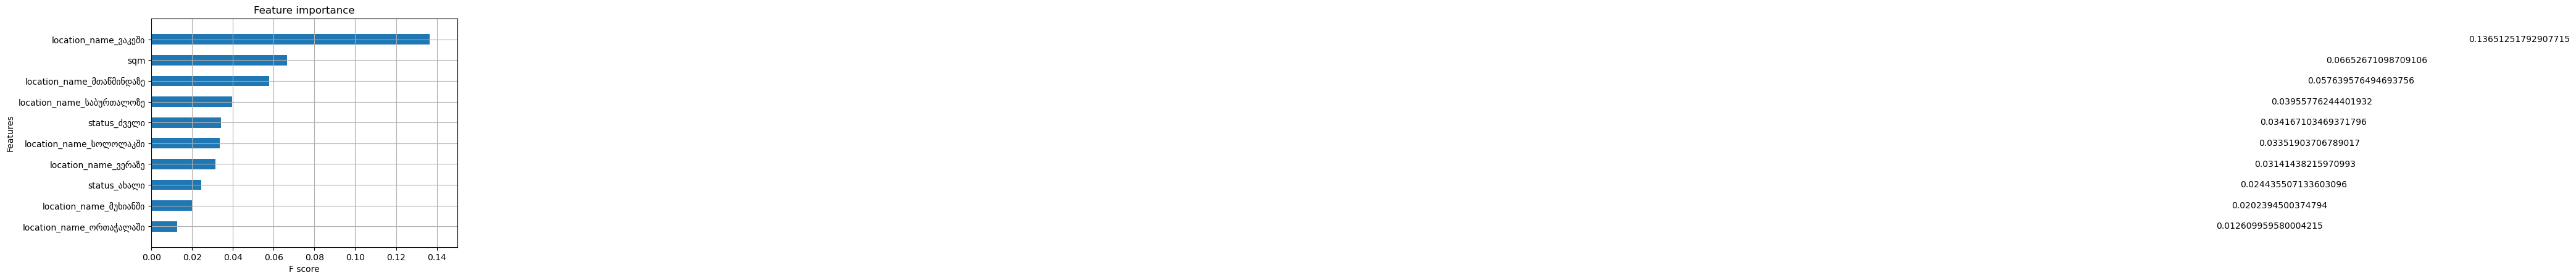

In [51]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

xgbr = xgb.XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)

xgbr.fit(X_train, y_train)

y_pred_dev_xgb = xgbr.predict(X_dev)
y_pred_test_xgb = xgbr.predict(X_test)

r2_dev_xgb = r2_score(y_dev, y_pred_dev_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)

print(f"R2 - Dev Score (XGB): {r2_dev_xgb}")
print(f"R2 - Test Score (XGB): {r2_test_xgb}")

mae_dev_xgb = mean_absolute_error(y_dev, y_pred_dev_xgb)
mse_dev_xgb = mean_squared_error(y_dev, y_pred_dev_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)

print(f"MAE - Dev (XGB): {mae_dev_xgb}")
print(f"MSE - Dev (XGB): {mse_dev_xgb}")
print(f"MAE - Test (XGB): {mae_test_xgb}")
print(f"MSE - Test (XGB): {mse_test_xgb}")

xgb.plot_importance(xgbr, height=0.5, max_num_features=10, importance_type='gain')
plt.show()


This suggests that there isnt enough location data in order for model to make 
successful predictions, although its clear that location plays second most
importand role in predicting the price of the apartment in Tbilisi. 